In [1]:
# PROJECT 2: Student's Performance Analysis

In [2]:
# Import necessary libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score,train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import re


In [3]:
df=pd.read_csv('Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
# to check whether there is null values

df.isnull().any()

StudentID            False
Age                  False
Gender               False
Ethnicity            False
ParentalEducation    False
StudyTimeWeekly      False
Absences             False
Tutoring             False
ParentalSupport      False
Extracurricular      False
Sports               False
Music                False
Volunteering         False
GPA                  False
GradeClass           False
dtype: bool

In [6]:
# to check null values, if so taking sum of null values

df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [7]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [8]:
df.drop('StudentID', axis=1, inplace=True)
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [9]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [10]:
# to check the duplicated values

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2387    False
2388    False
2389    False
2390    False
2391    False
Length: 2392, dtype: bool

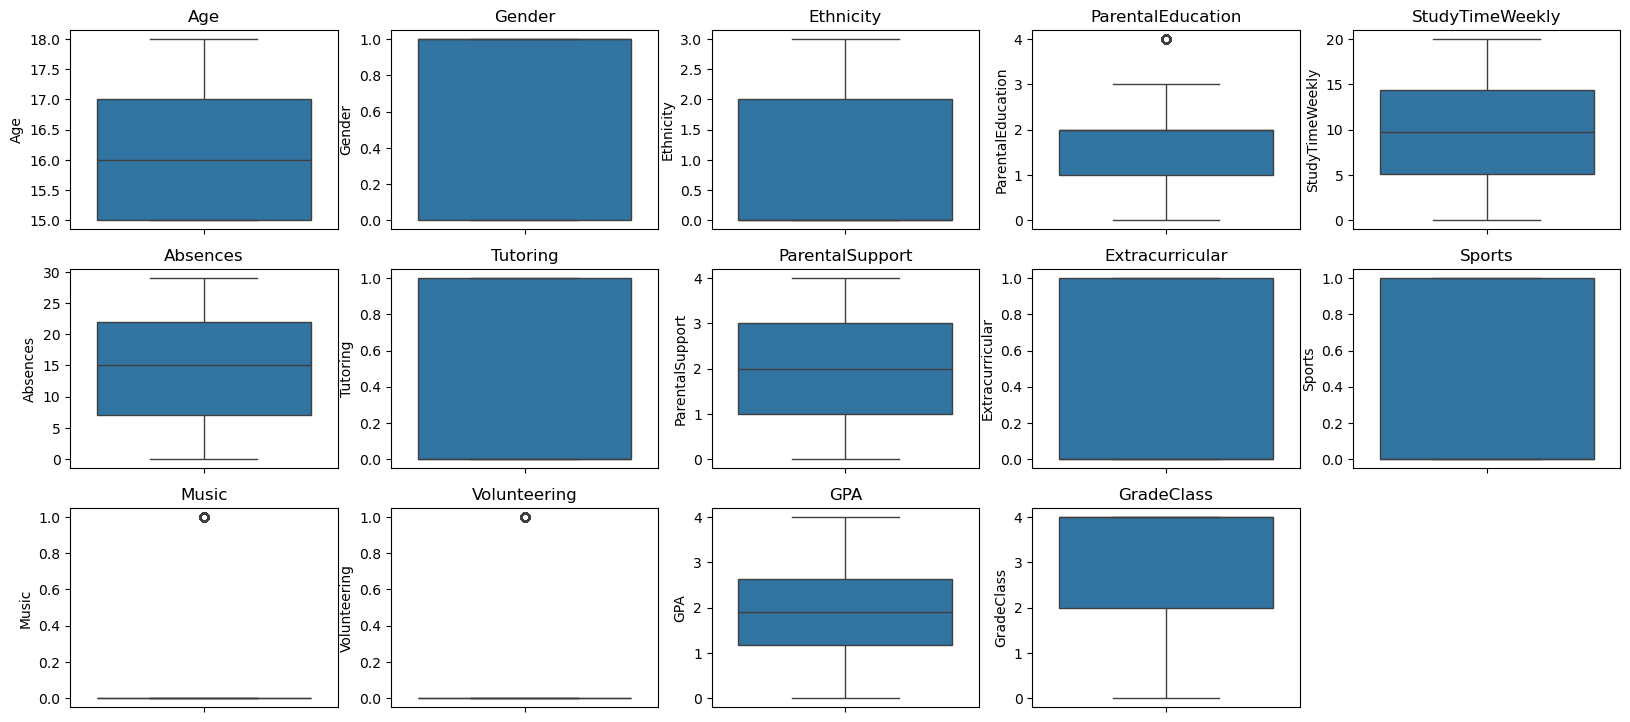

In [11]:
# to check outliers in numerical columns using boxplot

plt.figure(figsize=(20,15)) 
Numericals=['Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GPA','GradeClass']
plot=1
for i in Numericals:
    plt.subplot(5,5,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [12]:
# removing outliers using IQR method

Numerical=df[['Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GPA','GradeClass']]
for i in Numerical:
    flag=True
    while(flag):
        q25,q75=np.percentile(df[i],[25,75])
        IQR=q75-q25
        lower_limit=q25-1.5*IQR
        upper_limit=q75+1.5*IQR
        if(df[i]<lower_limit).sum() or (df[i]>upper_limit).sum():
            df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])
            df[i]=np.where(df[i]<lower_limit,upper_limit,df[i])
            flag=True
        else:
            flag=False

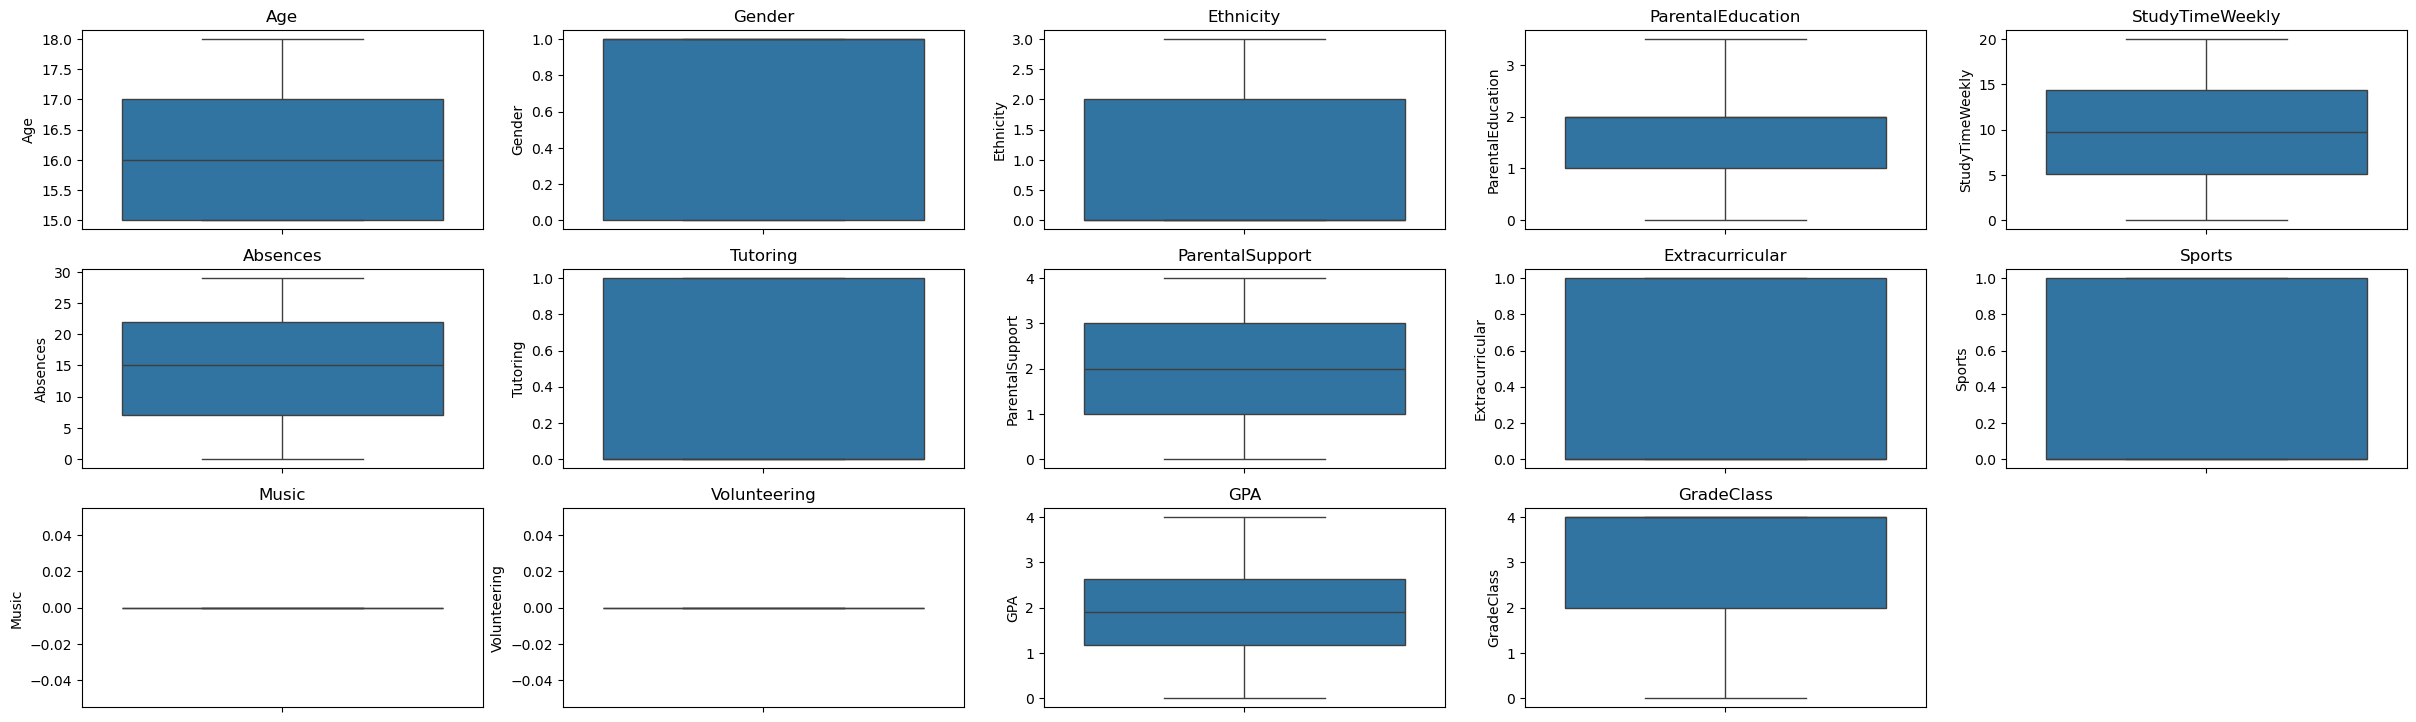

In [13]:
# rechecking

plt.figure(figsize=(30,15))
Numericals=['Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GPA','GradeClass']
plot=1
for i in Numericals:
    plt.subplot(5,5,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [14]:
# mapping numeric GradeClasses to letter grades

grade_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'F',
}

# apply the mapping to the GradeClass column
df['GradeClass'] = df['GradeClass'].map(grade_mapping)

# Display the updated DataFrame
print(df[['GPA', 'GradeClass']].head())

        GPA GradeClass
0  2.929196          C
1  3.042915          B
2  0.112602          F
3  2.054218          D
4  1.288061          F


In [15]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2.0,19.833723,7,1,2,0,0,0.0,0.0,2.929196,C
1,18,0,0,1.0,15.408756,0,0,1,0,0,0.0,0.0,3.042915,B
2,15,0,2,3.0,4.210570,26,0,2,0,0,0.0,0.0,0.112602,F
3,17,1,0,3.0,10.028829,14,0,3,1,0,0.0,0.0,2.054218,D
4,17,1,0,2.0,4.672495,17,1,3,0,0,0.0,0.0,1.288061,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3.0,10.680555,2,0,4,1,0,0.0,0.0,3.455509,A
2388,17,0,0,1.0,7.583217,4,1,4,0,1,0.0,0.0,3.279150,F
2389,16,1,0,2.0,6.805500,20,0,2,0,0,0.0,0.0,1.142333,C
2390,16,1,1,0.0,12.416653,17,0,2,0,1,0.0,0.0,1.803297,B


In [16]:
df['GradeClass'].unique 

<bound method Series.unique of 0       C
1       B
2       F
3       D
4       F
       ..
2387    A
2388    F
2389    C
2390    B
2391    B
Name: GradeClass, Length: 2392, dtype: object>

In [17]:
# to convert categorical column into numerical column

le=LabelEncoder()
df['GradeClass']=le.fit_transform (df ['GradeClass'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   float64
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   float64
 11  Volunteering       2392 non-null   float64
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int32  
dtypes: float64(5), int32(1), int64(8)
memory usage: 252.4 KB


In [19]:
# Split-Dependent and Independent Variables

x=df.drop(['GradeClass'],axis=1)
x

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2.0,19.833723,7,1,2,0,0,0.0,0.0,2.929196
1,18,0,0,1.0,15.408756,0,0,1,0,0,0.0,0.0,3.042915
2,15,0,2,3.0,4.210570,26,0,2,0,0,0.0,0.0,0.112602
3,17,1,0,3.0,10.028829,14,0,3,1,0,0.0,0.0,2.054218
4,17,1,0,2.0,4.672495,17,1,3,0,0,0.0,0.0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3.0,10.680555,2,0,4,1,0,0.0,0.0,3.455509
2388,17,0,0,1.0,7.583217,4,1,4,0,1,0.0,0.0,3.279150
2389,16,1,0,2.0,6.805500,20,0,2,0,0,0.0,0.0,1.142333
2390,16,1,1,0.0,12.416653,17,0,2,0,1,0.0,0.0,1.803297


In [20]:
y=df.GradeClass
y

0       2
1       1
2       4
3       3
4       4
       ..
2387    0
2388    4
2389    2
2390    1
2391    1
Name: GradeClass, Length: 2392, dtype: int32

In [21]:
logistic=[]
dc=[]
rc=[]
svc=[]
cc=[]
nb=[]
knn=[]

In [22]:
def score(model, xtrain, xtest, ytrain,ytest):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

In [23]:
kf=KFold(n_splits=3)
for train_index,test_index in kf.split(x):    
    xtrain,xtest=x.loc[train_index],x.loc[test_index]
    ytrain,ytest=y.loc[train_index],y.loc[test_index]
    logistic.append(score(LogisticRegression(),xtrain,xtest,ytrain,ytest))
    dc.append(score(DecisionTreeClassifier(), xtrain, xtest, ytrain,ytest))
    rc.append(score(RandomForestClassifier(), xtrain, xtest, ytrain,ytest))
    svc.append(score(SVC(),xtrain,xtest,ytrain,ytest))
    cc.append(score(CatBoostClassifier(),xtrain,xtest,ytrain,ytest))
    nb.append(score(GaussianNB(),xtrain,xtest,ytrain,ytest))
    knn.append(score(KNeighborsClassifier(),xtrain,xtest,ytrain,ytest))
print(logistic)
print(dc)
print(rc)
print(svc)
print(cc)
print(nb)
print(knn)

Learning rate set to 0.081031
0:	learn: 1.4386676	total: 159ms	remaining: 2m 39s
1:	learn: 1.3131334	total: 169ms	remaining: 1m 24s
2:	learn: 1.2021506	total: 176ms	remaining: 58.5s
3:	learn: 1.1098397	total: 182ms	remaining: 45.4s
4:	learn: 1.0520739	total: 187ms	remaining: 37.2s
5:	learn: 0.9909924	total: 191ms	remaining: 31.7s
6:	learn: 0.9337957	total: 195ms	remaining: 27.7s
7:	learn: 0.8791492	total: 199ms	remaining: 24.7s
8:	learn: 0.8322784	total: 204ms	remaining: 22.4s
9:	learn: 0.8013584	total: 208ms	remaining: 20.6s
10:	learn: 0.7672031	total: 213ms	remaining: 19.1s
11:	learn: 0.7382675	total: 217ms	remaining: 17.9s
12:	learn: 0.7102139	total: 222ms	remaining: 16.8s
13:	learn: 0.6844805	total: 226ms	remaining: 15.9s
14:	learn: 0.6633746	total: 230ms	remaining: 15.1s
15:	learn: 0.6466319	total: 234ms	remaining: 14.4s
16:	learn: 0.6299835	total: 239ms	remaining: 13.8s
17:	learn: 0.6139083	total: 243ms	remaining: 13.2s
18:	learn: 0.5990641	total: 247ms	remaining: 12.8s
19:	learn

In [24]:
acc_logistic=np.mean(logistic)
acc_dc=np.mean(dc)
acc_rc=np.mean(rc)
acc_svc=np.mean(svc)
acc_cc=np.mean(cc)
acc_nb=np.mean(nb)
acc_knn=np.mean(knn)
print('Accuracy of Logistic:',acc_logistic)
print('Accuracy of Decision:',acc_dc)
print('Accuracy of Random :',acc_rc)
print('Accuracy of SVC:',acc_svc)
print('Accuracy of CatBoost:',acc_cc)
print('Accuracy of Naive:',acc_nb)
print('Accuracy of KNeighbour:',acc_knn)

Accuracy of Logistic: 0.7420558925544727
Accuracy of Decision: 0.8344418134420115
Accuracy of Random : 0.9180290751974037
Accuracy of SVC: 0.7182065368356064
Accuracy of CatBoost: 0.9247203118628861
Accuracy of Naive: 0.8022413834670323
Accuracy of KNeighbour: 0.6927004881505311


In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=78)
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

1674 1674
718 718


In [26]:
# hyperparameter Tuning

rf_param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2,4],
    'max_features': ['sqrt','log2']
}

rf_model = RandomForestClassifier()
rf_rs = RandomizedSearchCV(rf_model, rf_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning RandomForest...")
rf_rs.fit(xtrain, ytrain)
rf_score = {'model': 'RandomForest', 'best_params': rf_rs.best_params_, 'best_score': rf_rs.best_score_}
print("RandomForest tuning completed!")


dt_param_grid = {
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt','log2']
}

dt_model = DecisionTreeClassifier()
dt_rs = RandomizedSearchCV(dt_model, dt_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning DecisionTree...")
dt_rs.fit(xtrain, ytrain)
dt_score = {'model': 'DecisionTree', 'best_params': dt_rs.best_params_, 'best_score': dt_rs.best_score_}
print("DecisionTree tuning completed!")

catboost_param_grid = {
    'iterations': [200, 500],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5],
    'border_count': [64],
    'bagging_temperature': [0.5],
    'min_data_in_leaf': [5, 10],
}
catboost_model = CatBoostClassifier(thread_count=-1,verbose=1)
catboost_rs = RandomizedSearchCV(catboost_model, catboost_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning CatBoost...")
catboost_rs.fit(xtrain, ytrain)
catboost_score = {'model': 'CatBoost', 'best_params': catboost_rs.best_params_, 'best_score': catboost_rs.best_score_}
print("CatBoost tuning completed!")

scores = [catboost_score, rf_score, dt_score]


Tuning RandomForest...
RandomForest tuning completed!
Tuning DecisionTree...
DecisionTree tuning completed!
Tuning CatBoost...
0:	learn: 1.5099411	total: 10.1ms	remaining: 2s
1:	learn: 1.4207536	total: 19.2ms	remaining: 1.91s
2:	learn: 1.3373053	total: 28.5ms	remaining: 1.87s
3:	learn: 1.2778888	total: 37.5ms	remaining: 1.84s
4:	learn: 1.2198509	total: 46.7ms	remaining: 1.82s
5:	learn: 1.1596263	total: 54.7ms	remaining: 1.77s
6:	learn: 1.1010907	total: 63ms	remaining: 1.74s
7:	learn: 1.0433515	total: 68.9ms	remaining: 1.65s
8:	learn: 0.9981904	total: 78ms	remaining: 1.66s
9:	learn: 0.9529862	total: 86.3ms	remaining: 1.64s
10:	learn: 0.9119183	total: 90.4ms	remaining: 1.55s
11:	learn: 0.8748166	total: 99.5ms	remaining: 1.56s
12:	learn: 0.8408307	total: 108ms	remaining: 1.56s
13:	learn: 0.8121086	total: 116ms	remaining: 1.54s
14:	learn: 0.7848728	total: 126ms	remaining: 1.55s
15:	learn: 0.7628539	total: 135ms	remaining: 1.55s
16:	learn: 0.7426979	total: 144ms	remaining: 1.55s
17:	learn: 

In [27]:
scores

[{'model': 'CatBoost',
  'best_params': {'min_data_in_leaf': 10,
   'learning_rate': 0.05,
   'l2_leaf_reg': 3,
   'iterations': 200,
   'depth': 8,
   'border_count': 64,
   'bagging_temperature': 0.5},
  'best_score': 0.9097968936678615},
 {'model': 'RandomForest',
  'best_params': {'n_estimators': 500,
   'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_features': 'sqrt',
   'max_depth': 20},
  'best_score': 0.913978494623656},
 {'model': 'DecisionTree',
  'best_params': {'splitter': 'best',
   'min_samples_split': 5,
   'min_samples_leaf': 4,
   'max_features': 'log2',
   'max_depth': 15,
   'criterion': 'entropy'},
  'best_score': 0.8148148148148149}]

In [28]:
model=CatBoostClassifier(learning_rate=0.05,l2_leaf_reg=3,iterations=200,depth=8,border_count= 64,bagging_temperature=0.5,min_data_in_leaf=10)
model.fit(xtrain,ytrain)

0:	learn: 1.5099411	total: 8.19ms	remaining: 1.63s
1:	learn: 1.4207536	total: 16.1ms	remaining: 1.6s
2:	learn: 1.3373053	total: 24.7ms	remaining: 1.62s
3:	learn: 1.2778888	total: 34.1ms	remaining: 1.67s
4:	learn: 1.2198509	total: 42.4ms	remaining: 1.65s
5:	learn: 1.1596263	total: 48.9ms	remaining: 1.58s
6:	learn: 1.1010907	total: 56.4ms	remaining: 1.55s
7:	learn: 1.0433515	total: 61.2ms	remaining: 1.47s
8:	learn: 0.9981904	total: 67.6ms	remaining: 1.43s
9:	learn: 0.9529862	total: 74.5ms	remaining: 1.41s
10:	learn: 0.9119183	total: 77.1ms	remaining: 1.32s
11:	learn: 0.8748166	total: 82.3ms	remaining: 1.29s
12:	learn: 0.8408307	total: 89.6ms	remaining: 1.29s
13:	learn: 0.8121086	total: 95.1ms	remaining: 1.26s
14:	learn: 0.7848728	total: 102ms	remaining: 1.26s
15:	learn: 0.7628539	total: 109ms	remaining: 1.25s
16:	learn: 0.7426979	total: 117ms	remaining: 1.26s
17:	learn: 0.7171682	total: 123ms	remaining: 1.24s
18:	learn: 0.7013243	total: 129ms	remaining: 1.23s
19:	learn: 0.6796522	total: 

In [29]:
xtrain

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
1085,15,0,1,2.0,3.669158,11,1,2,0,0,0.0,0.0,1.684842
2046,16,1,3,3.0,10.642359,6,0,4,1,1,0.0,0.0,3.125270
1563,16,1,2,3.5,11.815074,19,0,2,1,0,0.0,0.0,1.566289
41,17,0,0,1.0,14.294046,7,0,2,0,0,0.0,0.0,2.625128
1083,18,0,2,1.0,15.870748,22,0,3,0,0,0.0,0.0,1.100172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,16,0,0,2.0,8.367667,2,0,4,1,0,0.0,0.0,3.286585
2153,15,0,2,2.0,16.193485,18,0,3,0,0,0.0,0.0,1.733364
40,17,1,3,2.0,11.314946,23,1,1,0,0,0.0,0.0,1.058287
1943,16,0,0,0.0,17.243059,12,0,2,1,0,0.0,0.0,2.073545


In [30]:
ytrain

1085    4
2046    1
1563    4
41      2
1083    4
       ..
2358    1
2153    4
40      4
1943    3
470     1
Name: GradeClass, Length: 1674, dtype: int32

In [31]:
model.score(xtest,ytest)

0.9178272980501393

In [32]:
label= ['A','B','C','D','F']

In [33]:
# testing

output1 = model.predict([[18,1,2,1.0,3.772645,7,0,2,1,1,0.0,0.0,2.525116]])[0]
output1 =int(output1)
print(label[output1])

C


In [34]:
# testing 

output2=model.predict([[15,0,2,1.0,11.448155,19,0,2,0,0,0.0,0.0,0.881866]])[0]
output2 =int(output2)
print(label[output2])

F


In [35]:
ypred=model.predict(xtest)
ypred

array([[4],
       [4],
       [4],
       [3],
       [4],
       [2],
       [4],
       [4],
       [1],
       [4],
       [4],
       [1],
       [1],
       [3],
       [4],
       [3],
       [4],
       [0],
       [4],
       [2],
       [4],
       [4],
       [3],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [1],
       [4],
       [4],
       [4],
       [3],
       [3],
       [2],
       [4],
       [1],
       [4],
       [3],
       [4],
       [1],
       [1],
       [4],
       [4],
       [4],
       [4],
       [0],
       [4],
       [4],
       [3],
       [1],
       [3],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [3],
       [2],
       [4],
       [4],
       [4],
       [2],
       [3],
       [3],
       [4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [2],
       [1],
       [4],
    

In [36]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 19,   0,   6,   3,   4],
       [  0,  71,   2,   4,   9],
       [  0,   4, 105,   2,   6],
       [  0,   3,   4, 110,   6],
       [  0,   1,   1,   4, 354]], dtype=int64)

<Axes: >

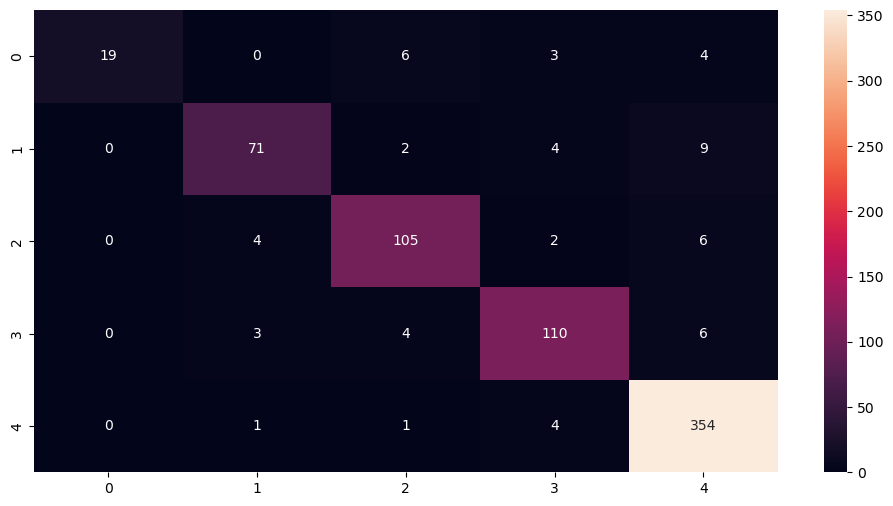

In [77]:
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d")

In [38]:
print("Accuracy_score:",accuracy_score(ytest,ypred))

Accuracy_score: 0.9178272980501393
